Quick check calculation
=====================

## Calculation

seperate hourly truth into low and high frequencies
Remove tides from high-frequency truth


/Users/wangjinb/anaconda3/lib/python3.7/site-packages/utide/harmonics.py:184: RuntimeWarning: invalid value encountered in fmod
  np.fmod(V, 1, out=V)


bandpass to get true NIO
generate synthetic wacm
<xarray.DataArray 'time' ()>
array('2007-09-26T11:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2007-09-26T11:00:00 22.402274808398204 14.905330677290838
2007-10-17T13:46:46.000000000
seperate hourly truth into low and high frequencies
Remove tides from high-frequency truth


/Users/wangjinb/anaconda3/lib/python3.7/site-packages/utide/harmonics.py:184: RuntimeWarning: invalid value encountered in fmod
  np.fmod(V, 1, out=V)


bandpass to get true NIO
generate synthetic wacm


KeyboardInterrupt: 

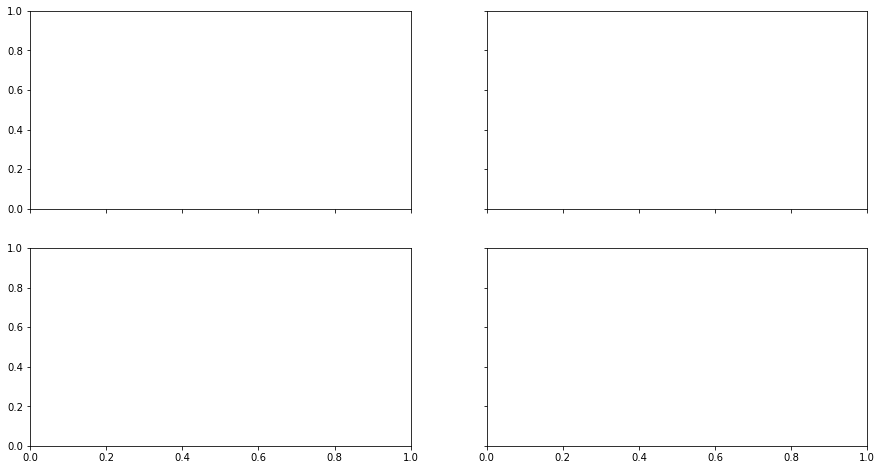

In [1]:
import slab_model
import pylab as plt
import numpy as np
import xarray as xr
from popy import utils
from scipy.io import loadmat
import pandas as pd

fig,ax=plt.subplots(2,2,figsize=(15,8),sharex=True,sharey=True)

xrod=xr.open_dataset

#use preprocess_mat2h5.ipynb to convert .mat files from Hong to HDF5
ss=['PaPa2','KEO2','NTAS2','WHOTS2','Stratus2']

fitting_method='Slab'

d700=slab_model.create_wacm_from_mooring(ss[1],1/4,1/4,'700_1800',velocity_type='modt')
print(d700.u_truth_total.time[0],d700.inertial_period,d700.wacm_sampling_period)

t0=np.datetime64('2007-10-17')
it0=d700.u_wacm_total.time>t0
t0=d700.u_wacm_total.time.data[it0][0]
print(t0)
t1=t0+np.timedelta64(13,'D')

sss=ss[1]

t_out=pd.date_range(t0,t1,freq='1h')

orbit='500_1000'
axx=ax[0,0]
d700=slab_model.create_wacm_from_mooring(sss,1/10,1/10,orbit,velocity_type='obs')

up,vp,utid,vtid,param=d700.get_wacm_nio(t_out,fitting_method='Slab',#periods=[],
                                        has_tides=False,uv_noise=0.,
                                        wind_noise=0,use_hourly_wind=False,
                                       include_nio=True)

d700.u_truth_high_notide_nio.interp(time=up.time).plot(label='obs nio',ax=axx,color='k')
(up).plot(label='slab',ax=axx)
d700.u_truth_high.interp(time=up.time).plot(label='obs high',ax=axx,color='gray',linestyle='--')
d700.u_wacm_high_notide.sel(time=slice(up.time[0],up.time[-1])).plot(marker='o',linestyle='',label='wacm obs',ax=axx)

up,vp,utid,vtid,param=d700.get_wacm_nio(t_out,fitting_method='Harmonics',periods=[],
                                        has_tides=False,uv_noise=0.,
                                        wind_noise=0,use_hourly_wind=False,
                                       include_nio=True)
(up).plot(label='Harmonics',ax=axx)
axx.legend(fontsize=12)
##########################
#500_1000 with noise
orbit='500_1000'
axx=ax[1,0]
up,vp,utid,vtid,param=d700.get_wacm_nio(t_out,fitting_method='Slab',#periods=[],
                                        has_tides=False,uv_noise=0.2,
                                        wind_noise=0,use_hourly_wind=False,
                                       include_nio=True)

d700.u_truth_high_notide_nio.interp(time=up.time).plot(label='obs nio',ax=axx,color='k')
(up).plot(label='slab',ax=axx)
d700.u_truth_high.interp(time=up.time).plot(label='obs high',ax=axx,color='gray',linestyle='--')
d700.u_wacm_high_notide.sel(time=slice(up.time[0],up.time[-1])).plot(marker='o',linestyle='',label='wacm obs',ax=axx)

up,vp,utid,vtid,param=d700.get_wacm_nio(t_out,fitting_method='Harmonics',periods=[],
                                        has_tides=False,uv_noise=0.2,
                                        wind_noise=0,use_hourly_wind=False,
                                       include_nio=True)
(up).plot(label='Harmonics',ax=axx)
#axx.legend(fontsize=12)


#t1=t0+np.timedelta64(13,'D')

##############
orbit='700_1800'
axx=ax[0,1]
d700=slab_model.create_wacm_from_mooring(sss,1/10,1/10,orbit,velocity_type='obs')

up,vp,utid,vtid,param=d700.get_wacm_nio(t_out,fitting_method='Slab',#periods=[],
                                        has_tides=False,uv_noise=0.,
                                        wind_noise=0,use_hourly_wind=False,
                                       include_nio=True)

d700.u_truth_high_notide_nio.interp(time=up.time).plot(label='obs nio',ax=axx,color='k')
(up).plot(label='slab',ax=axx)

d700.u_truth_high.interp(time=up.time).plot(label='obs high',ax=axx,color='gray',linestyle='--')
d700.u_wacm_high_notide.sel(time=slice(up.time[0],up.time[-1])).plot(marker='o',linestyle='',label='wacm obs',ax=axx)

up,vp,utid,vtid,param=d700.get_wacm_nio(t_out,fitting_method='Harmonics',periods=[],
                                        has_tides=False,uv_noise=0.0,
                                        wind_noise=0,use_hourly_wind=False,
                                       include_nio=True)
(up).plot(label='Harmonics',ax=axx)
#axx.legend(fontsize=12)
axx.set_ylim(-0.6,0.6)


##########################
#700_1800 with noise
orbit='700_1800'
axx=ax[1,1]
up,vp,utid,vtid,param=d700.get_wacm_nio(t_out,fitting_method='Slab',#periods=[],
                                        has_tides=False,uv_noise=0.2,
                                        wind_noise=0,use_hourly_wind=False,
                                       include_nio=True)

d700.u_truth_high_notide_nio.interp(time=up.time).plot(label='obs nio',ax=axx,color='k')
(up).plot(label='slab',ax=axx)
d700.u_truth_high.interp(time=up.time).plot(label='obs high',ax=axx,color='gray',linestyle='--')
d700.u_wacm_high_notide.sel(time=slice(up.time[0],up.time[-1])).plot(marker='o',linestyle='',label='wacm obs',ax=axx)

up,vp,utid,vtid,param=d700.get_wacm_nio(t_out,fitting_method='Harmonics',periods=[],
                                        has_tides=False,uv_noise=0.2,
                                        wind_noise=0,use_hourly_wind=False,
                                       include_nio=True)
(up).plot(label='Harmonics',ax=axx)
##########################
#axx.legend(fontsize=12)
axx.set_ylim(-0.6,0.6)
ax[1,0].set_xlabel('Time',fontsize=20)
ax[1,1].set_xlabel('Time',fontsize=20)
ax[0,0].set_ylabel('m/s',fontsize=20)
ax[1,0].set_ylabel('m/s',fontsize=20)
ax[1,0].set_xlim(t0+np.timedelta64(3,'D'),t1-np.timedelta64(3,'D'))
plt.tight_layout()


ax[0,0].text(t_out[72],0.5,'(a)')
ax[0,1].text(t_out[72],0.5,'(b)')
ax[1,0].text(t_out[72],0.5,'(c)')
ax[1,1].text(t_out[72],0.5,'(d)')

plt.savefig('figures/KEO_example.pdf')
plt.savefig('figures/KEO_example.png')



In [ ]:
fig,ax=plt.subplots(figsize=(30,10))
(up).plot(label='wacm')
d700.u_truth_high_notide_nio.interp(time=up.time).plot(label='obs')

d700.u_truth_high.interp(time=up.time).plot(label='obs high')
#d700.u_truth_high_notide.interp(time=up.time).plot(label='obs high notide')


#(up+utid.interp(time=up.time)).plot(linestyle='--',label='wacm+tide')
d700.u_wacm_high.sel(time=slice(up.time[0],up.time[-1])).plot(marker='o',linestyle='',label='obs')

plt.legend()

In [ ]:
from scipy import signal
import utide


u=d700.u_truth_high.sel(time=slice(up.time[0],up.time[-1]))
v=d700.v_truth_high.sel(time=slice(up.time[0],up.time[-1]))

tt=(u.time.values-u.time.values[0])/np.timedelta64(1,'s')/86400 #convert to days

cc=utide.solve(tt,u.values,v.values, 
                   lat=d700.lat0,verbose=False)

tide=utide.reconstruct(tt,cc,verbose=False)
ut=u*0
vt=v*0
ut.values[:]=tide.u*1
vt.values[:]=tide.v*1

fig,ax=plt.subplots(3,1,figsize=(30,30))
u.plot(label='obs high',ax=ax[0])
ut.plot(label='obs tide',ax=ax[0])
ax[0].legend()

(u-ut).plot(label='obs detide',ax=ax[1])
up.plot(label='wacm nio',ax=ax[1])
d700.u_truth_high_notide_nio.interp(time=up.time).plot(ax=ax[1],label='obs nio')

ax[1].legend()

In [ ]:
fig,ax=plt.subplots(figsize=(30,10))

d700.u_truth_high_notide_nio.interp(time=d700.nio_reconstruction_u.time).plot(lw=1)
d700.nio_reconstruction_u.plot(lw=1)

In [ ]:
fig,ax=plt.subplots(figsize=(20,10))

d.u_truth_high_notide_nio.resample(time='5D').std().plot(lw=2)
d.nio_reconstruction_u.resample(time='5D').std().plot(lw=2)